In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 

In [3]:
def read_file(file):
    
    
    check_in_data=[]

    with open(file,"r") as f:
        text = f.readlines()
        
    
    for line in text:
        check_in_data.append(line)
        
    return check_in_data

In [4]:
checkin_data=read_file("loc-gowalla_totalCheckins.txt")



In [5]:
user_time={}
user_location={}
user_map={}

location_latitude_alongitube={}

In [6]:

i=0
for line in checkin_data:
    
    temp=line.split("\t")
        
    #splitting user data
    user=temp[0]
    
    time=temp[1]
    
    lat_lon=temp[2]+"$"+temp[3]
    
    loc=temp[4].replace('\n','')
    
    
#     print(user,time,lat_lon,loc)
    
    #getting user location values
    if (user in user_location):
        
        if loc in user_location[user]:
                user_location[user][loc]=user_location[user][loc]+1
        else:
                user_location[user][loc]={}
                user_location[user][loc]=1
    else:
        
#         print("else 1")
        user_location[user]={}
        user_location[user][loc]=1
    
    
    
    #getting user location values
    
    if (user in user_map):
        
        if lat_lon in user_map[user]:
                user_map[user][lat_lon]=user_map[user][lat_lon]+1
        else:
                user_map[user][lat_lon]={}
                user_map[user][lat_lon]=1
    else:
        
#         print("else 2")
        user_map[user]={}
        user_map[user][lat_lon]=1
        
    
    
    if (user in user_time):
        
        if time in user_time[user]:
                user_time[user][time]=user_time[user][time]+1
        else:
                user_time[user][time]={}
                user_time[user][time]=1
    else:
        
#         print("else 2")
        user_time[user]={}
        user_time[user][time]=1
        
        
        
    if (loc not in location_latitude_alongitube):
            location_latitude_alongitube[loc]=lat_lon
    
    
    i=i+1
    
    if(i==100000):
        break

In [7]:
import operator

In [8]:
def find_home(list_place):
    
    sorted_d = sorted(list_place.items(), key=operator.itemgetter(1))
    
#     print(sorted_d)
    
    temp=0
    for k,v in sorted_d:
#         print(k,v)
        temp=temp+v
    
#     print(temp/len(sorted_d))
    
    tv=temp/len(sorted_d)
    
#     print(tv)
    h_loc=-1
    for k,v in sorted_d:
        if v>=tv:
            h_loc=k
            break
    
   

    return h_loc

In [9]:
user_home={}

for k in user_location.keys():
#     print(k)
    loc=find_home(user_location[k])
    user_home[k]=loc

In [10]:

user_home_lat_long={}

for k, v in user_home.items():
#     print(v)
    
    if k not in user_home_lat_long:
        user_home_lat_long[k]=location_latitude_alongitube[v]
        

In [11]:
import geopy.distance

In [12]:
# user_home_lat_long

def m_dist(c1,c2):
    return geopy.distance.vincenty(c1, c2)


In [13]:

user_li=[]
distance_li=[]


for k,v in user_home_lat_long.items():
    
#     print(k,v)  
    
    list_t=list(user_map[k])
    
    d=0
    for t in list_t:
        
#         print(t)        
        t1=v.split("$")
        t2=t.split("$")
        
        coords_1 = (float(t1[0]),float(t1[1]))
        coords_2 = (float(t2[0]),float(t2[1]))
        
#         print(coords_2)
        
        t=m_dist(coords_1,coords_2)
        
#         print(str(t).split(" ")[0])
        
        t=float(str(t).split(" ")[0])
        
        d=d+t
        
#         print("distance ",d)
    user_li.append(k)
    distance_li.append(d)
#     break
    




/home/sathis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  after removing the cwd from sys.path.


In [14]:
# user_li



# distribution of distance from home

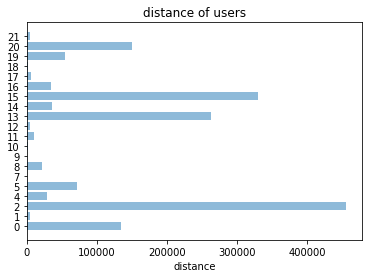

In [15]:
objects = user_li[:20]
y_pos = np.arange(len(objects))
performance = distance_li[:20]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('distance')
plt.title('distance of users')
 
plt.show()

# probability that a user will travel to friend’s home vs the
# distance of check-in points of the user

In [16]:
friend_data=read_file("edges2500.txt")

In [17]:

friend_list={}

for line in friend_data:
#     print(line)
    temp=line.split('\t')
#     print(temp[0],temp[1])

    if temp[0] not in friend_list:
        friend_list[temp[0]]=[]
        friend_list[temp[0]].append(temp[1].replace('\n',''))
    else:
        friend_list[temp[0]].append(temp[1].replace('\n',''))
    
    

In [18]:
friends_home={}



for k,v in friend_list.items():    

    #     print(k,v)  
    for t in v:
        
        if t not in user_home:
            continue
            
#         print(t,user_home[t])
        
        if k not in friends_home:
            friends_home[k]=[]
            friends_home[k].append(user_home[t])
        else:
            friends_home[k].append(user_home[t])
    
    
#     print(user_home['5'])
    
#     if temp[0] not in friend_list:
#         friend_list[temp[0]]=[]
#         friend_list[temp[0]].append(temp[1].replace('\n',''))
#     else:
# #         friend_list[temp[0]].append(temp[1].replace('\n',''))
    
#     print(list(user_location['5']))
    
#     print('906408' in list(user_location['5']))
    

#     break
    

In [103]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3

In [104]:


c_list=[]
f_list=[]

for k,v in user_location.items():
   
   
    
    
    if k not in friends_home:
        continue
    
    t1=len(list(v))
    
    t2=(len(intersection(friends_home[k],list(v))))
    
    c_list.append(t1)
    
    f_list.append(t2)
    
    print(k)
#     break






0
1
2


In [105]:
friends_home.keys()

dict_keys(['0', '1', '2'])

In [106]:
c_list

[135, 12, 1870]

In [107]:
f_list

[19, 0, 2]

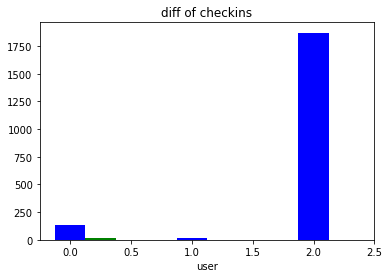

In [132]:
import numpy as np
import matplotlib.pyplot as plt

data = [c_list,f_list]

X = np.arange(len(c_list))
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25,label="checkedin")
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25,label="friendshome")
# plt.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.xlabel('user')
plt.title('diff of checkins')
plt.show()

# Plot of userA and userB location on time

In [127]:
def parse_data(lat_lon_l):
    
    lat_l=[]
    lon_l=[]
    
    for t in lat_lon_l:
        lat_l.append(t.split("$")[0])
        lon_l.append(t.split("$")[1])
        
    return lat_l,lon_l

In [130]:
def plot_location(u1,u2):
        
#         print(u1.keys())
        
        u1_l=list(u1.keys())
        
        u2_l=list(u2.keys())
        
#         print(u1_l[0].split("$"))

        u1_lat,u1_lon=parse_data(u1_l[:20])
    
        u2_lat,u2_lon=parse_data(u2_l[:20])
        
        int_lat=intersection(u1_lat,u2_lat)
        
        int_lon=intersection(u1_lon,u2_lon)
        
        if(len(int_lat)>0):
            

            plt.scatter(u1_lat, u1_lon,c="red",marker='*',label="user1")

            plt.scatter(u2_lat, u2_lon,c="green",marker='+',label="user2")

            plt.scatter(int_lat, int_lon,c="blue",marker='v',label="common")

            plt.show()
            
            return 1
        return 0
        
    
    
    

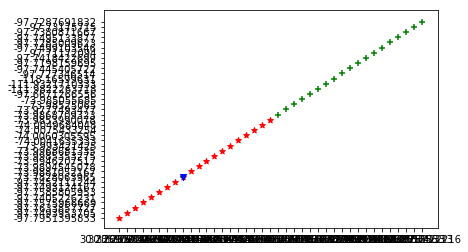

In [131]:
for k,v in friend_list.items():
#     print(k,v)
    
    for fv in v:
        
#         print(k,fv)
#         print(user_map[k])
#         print(user_map[fv])
        if fv not in user_map:
            continue
        
        t=plot_location(user_map[k],user_map[fv])
        
        if(t==1):
            break
    
    break

# limits of using friendship data in predicting mobility of user.

User might have went to all the checkedin locations under the influence of his friends

Degree of closeness may vary which is difficult to predicte

It may favor close friends more

Predicting  uncommon place will be difficult